## **Imports**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
fraud = pd.read_csv("../data/processed/1-DataCleaning/fraud.csv")
fraud

,Call_Type,Charging_Tm,Call_Duration,Location,A_Num,B_Num,cell_id,IMEI,TAC,DESTINATION,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH
0,0,2024-12-02 00:47:00,25.535412,33790,428,35938,768263.0,9234,5790,OTA,ON-NET,Basic & Feature Phone,2G
1,7,2024-12-02 01:05:00,2.000000,20960,699,24396,778837.0,13327,134,OTA-SHORT,OTA-SHORT,Smartphone,4G
2,7,2024-12-02 03:01:00,2.000000,33790,428,20411,768263.0,9234,5790,MOBILIS,OFF-NET,Basic & Feature Phone,2G
3,7,2024-12-02 06:01:00,2.000000,18486,541,24396,833511.0,1796,5563,OTA-SHORT,OTA-SHORT,Smartphone,4G
4,7,2024-12-02 07:33:00,2.000000,11638,376,24394,738832.0,14769,179,OTA,ON-NET,Modem,3G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14868,1,2024-12-11 16:25:00,9.457560,23934,698,17628,768357.0,4999,5664,NEDJMA,OFF-NET,Basic & Feature Phone,2G
14869,0,2024-12-11 16:30:00,67.148676,12804,637,44290,737772.0,1936,5572,OTA,ON-NET,Tablet,3G
14870,0,2024-12-11 16:37:00,147.537936,35797,712,33758,955472.0,14543,172,OTA,ON-NET,Smartphone,4G
14871,0,2024-12-11 16:42:00,55.799604,38030,649,45191,955958.0,4060,5633,OTA,ON-NET,Smartphone,4G


In [3]:
non_fraud = pd.read_csv("../data/processed/1-DataCleaning/non_fraud.csv")
non_fraud

,Call_Type,Charging_Tm,Call_Duration,LOCATION,A_Num,B_Num,cell_id,IMEI,TAC,DESTINATION_CAT,MU_HANDSET_DUAL_SIM,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH
0,0,2024-11-22 00:00:26,119.165256,2959,1425,177312,7538362.0,7444,2979,ON-NET,Y,Smartphone,4G
1,0,2024-11-22 00:00:28,43.504776,35793,10071,72269,7569883.0,5743,2289,OFF-NET,Y,Smartphone,4G
2,7,2024-11-22 00:00:57,2.000000,49480,6636,131825,7602564.0,8020,3171,ON-NET,Y,Smartphone,4G
3,7,2024-11-22 00:01:48,2.000000,39940,12606,131827,7544125.0,16170,5224,OTA-SHORT,Y,Smartphone,4G
4,1,2024-11-22 00:02:24,507.870972,4842,13817,193501,7466111.0,11658,4134,ON-NET,Y,Smartphone,4G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2024-11-30 23:56:19,22.698144,32169,8437,47806,7422451.0,11692,4138,OFF-NET,N,Smartphone,4G
49996,1,2024-11-30 23:57:50,42.559020,32166,11175,171909,7617469.0,13976,4680,ON-NET,Y,Smartphone,4G
49997,0,2024-11-30 23:58:07,15.132096,6869,3077,148200,7446705.0,4765,1919,ON-NET,Y,Smartphone,4G
49998,7,2024-11-30 23:58:25,2.000000,13188,3801,131826,7438630.0,6931,2820,OTA-SHORT,Y,Basic & Feature Phone,2G


## Data analysis & plotting

---

## Call Type (Type d'appel):

**Call_Type** Represents different types of calls, such as voice calls, SMS, or data. Here are the possible values and their meanings:

| **Call_Type** | **Description**           |
|---------------|---------------------------|
| `0`           | VOICE OUT (Outgoing voice call) |
| `7`           | SMS IN (Incoming SMS)      |
| `6`           | SMS OUT (Outgoing SMS)     |
| `1`           | VOICE-RF IN (Incoming voice call via RF) |
| `100`         | VOICE-F OUT (Transferred call) |
----

In [4]:
call_type_labels = {
    0: "VOICE OUT",
    7: "SMS IN",
    6: "SMS OUT",
    1: "VOICE-RF IN",
    100: "VOICE-F OUT"
}

In [5]:
# Create a new column 'Call_Type_Description' in both fraud and non-fraud datasets based on the mapping
fraud['Call_Type_Description'] = fraud['Call_Type'].map(call_type_labels)
non_fraud['Call_Type_Description'] = non_fraud['Call_Type'].map(call_type_labels)

fraud['is_fraud'] = 'Fraud'
non_fraud['is_fraud'] = 'Non-Fraud'

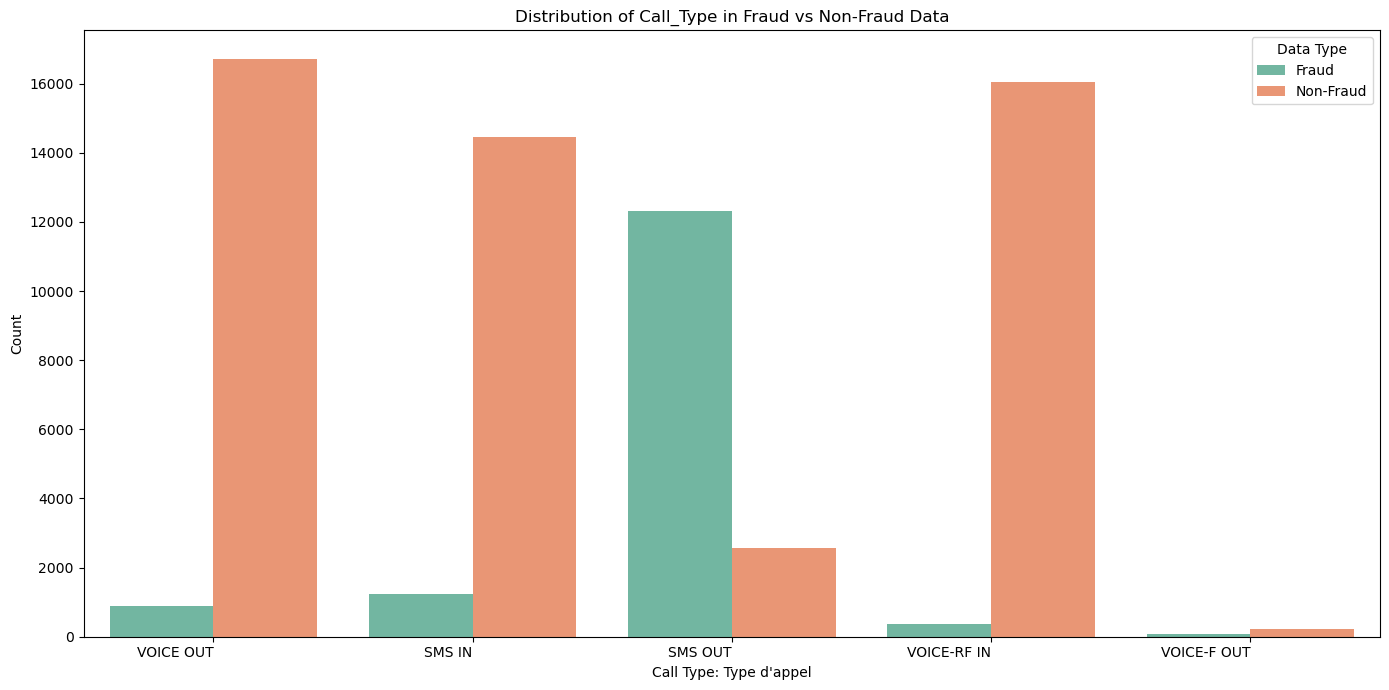

In [6]:

combined_data = pd.concat([fraud[['Call_Type_Description', 'is_fraud']], 
                           non_fraud[['Call_Type_Description', 'is_fraud']]])

plt.figure(figsize=(14, 7))
sns.countplot(x='Call_Type_Description', hue='is_fraud', data=combined_data, palette='Set2')

plt.title('Distribution of Call_Type in Fraud vs Non-Fraud Data')
plt.xlabel('Call Type: Type d\'appel')
plt.ylabel('Count')
plt.legend(title='Data Type')
plt.xticks(ha='right') 
plt.tight_layout()  
plt.show()

**` Observation:`** Most of the call types related to fraud are "SMS Out" — as most fraudulent actions involve sending SMS.

----


## Analysing Call_Duration
Call length in seconds or minutes.

C:\Users\pc\AppData\Local\Temp\ipykernel_8044\2134836537.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='is_fraud', y='Call_Duration', data=combined_data, jitter=True, palette='Set2', alpha=0.5)


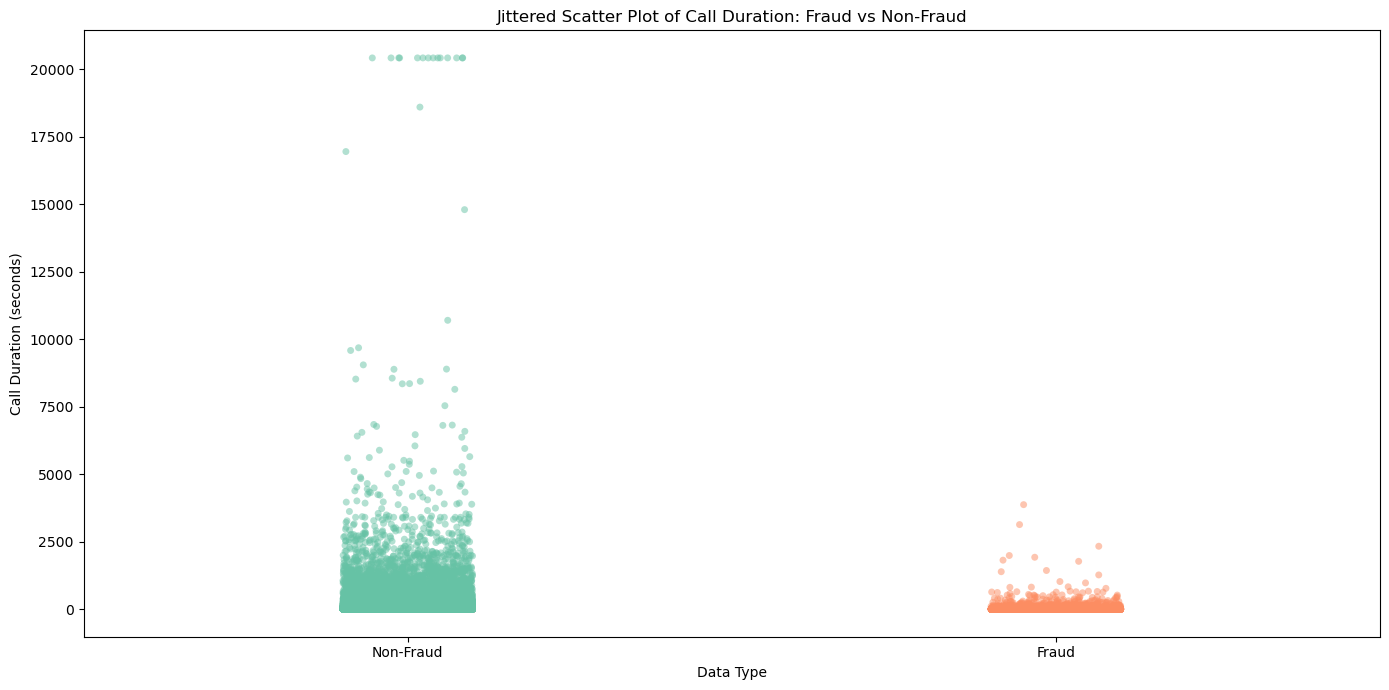

In [7]:

fraud['is_fraud'] = 1
non_fraud['is_fraud'] = 0

combined_data = pd.concat([fraud[['Call_Duration', 'is_fraud']], non_fraud[['Call_Duration', 'is_fraud']]])

# Jittered Scatter Plot
plt.figure(figsize=(14, 7))
sns.stripplot(x='is_fraud', y='Call_Duration', data=combined_data, jitter=True, palette='Set2', alpha=0.5)

plt.title('Jittered Scatter Plot of Call Duration: Fraud vs Non-Fraud')
plt.xlabel('Data Type')
plt.ylabel('Call Duration (seconds)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud']) 
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_8044\2189306181.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Call_Duration', data=fraud, shade=True, color='red', alpha=0.5, label='Fraud')
C:\Users\pc\AppData\Local\Temp\ipykernel_8044\2189306181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Call_Duration', data=non_fraud, shade=True, color='blue', alpha=0.5, label='Non-Fraud')


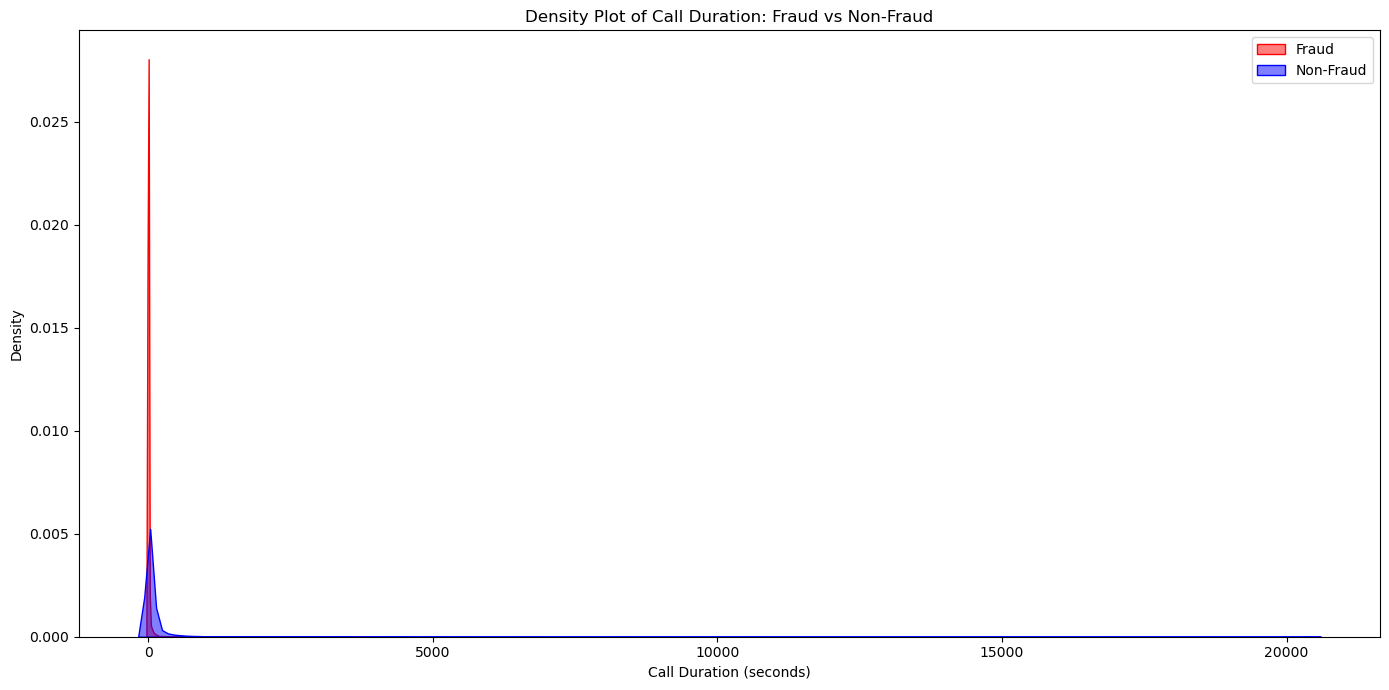

In [8]:
plt.figure(figsize=(14, 7))

# KDE Plot for Fraud Data
sns.kdeplot(x='Call_Duration', data=fraud, shade=True, color='red', alpha=0.5, label='Fraud')

# KDE Plot for Non-Fraud Data
sns.kdeplot(x='Call_Duration', data=non_fraud, shade=True, color='blue', alpha=0.5, label='Non-Fraud')


plt.title('Density Plot of Call Duration: Fraud vs Non-Fraud')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_8044\2965474774.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Call_Duration', data=fraud_data_filtered, shade=True, color='red', alpha=0.5)


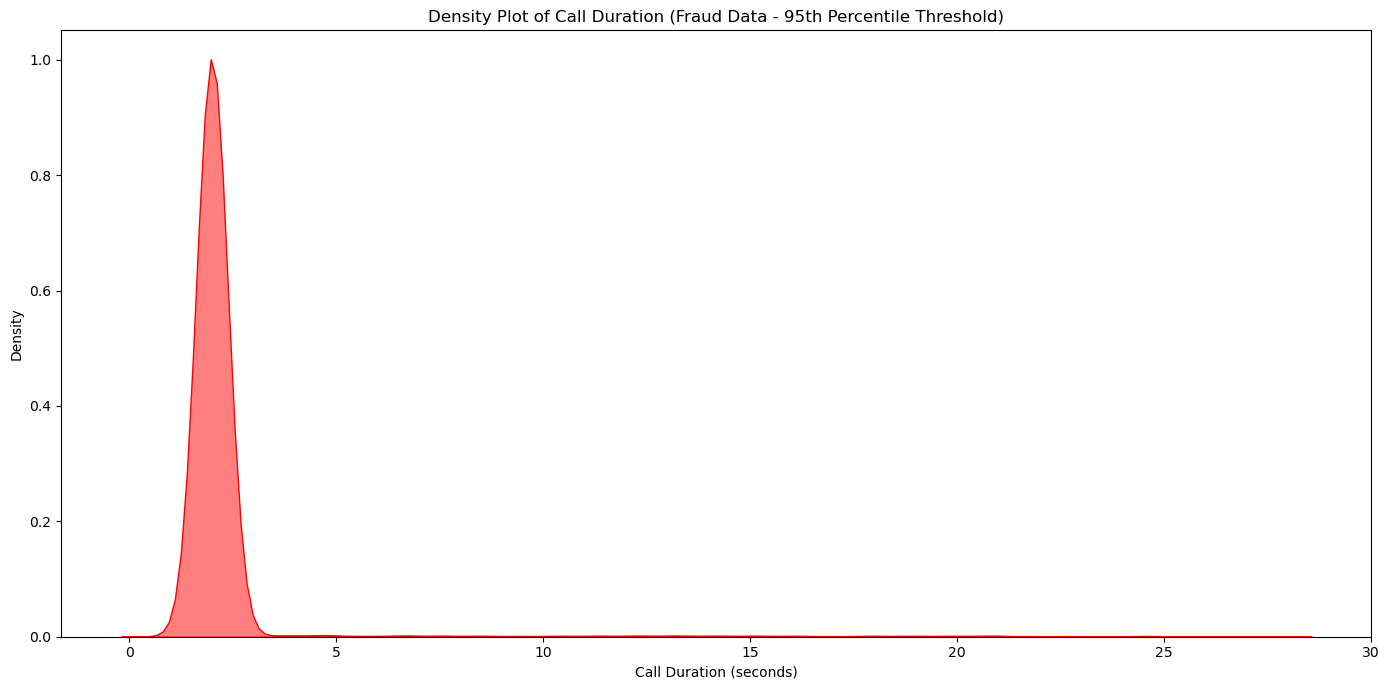

C:\Users\pc\AppData\Local\Temp\ipykernel_8044\2965474774.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Call_Duration', data=non_fraud_data_filtered, shade=True, color='blue', alpha=0.5)


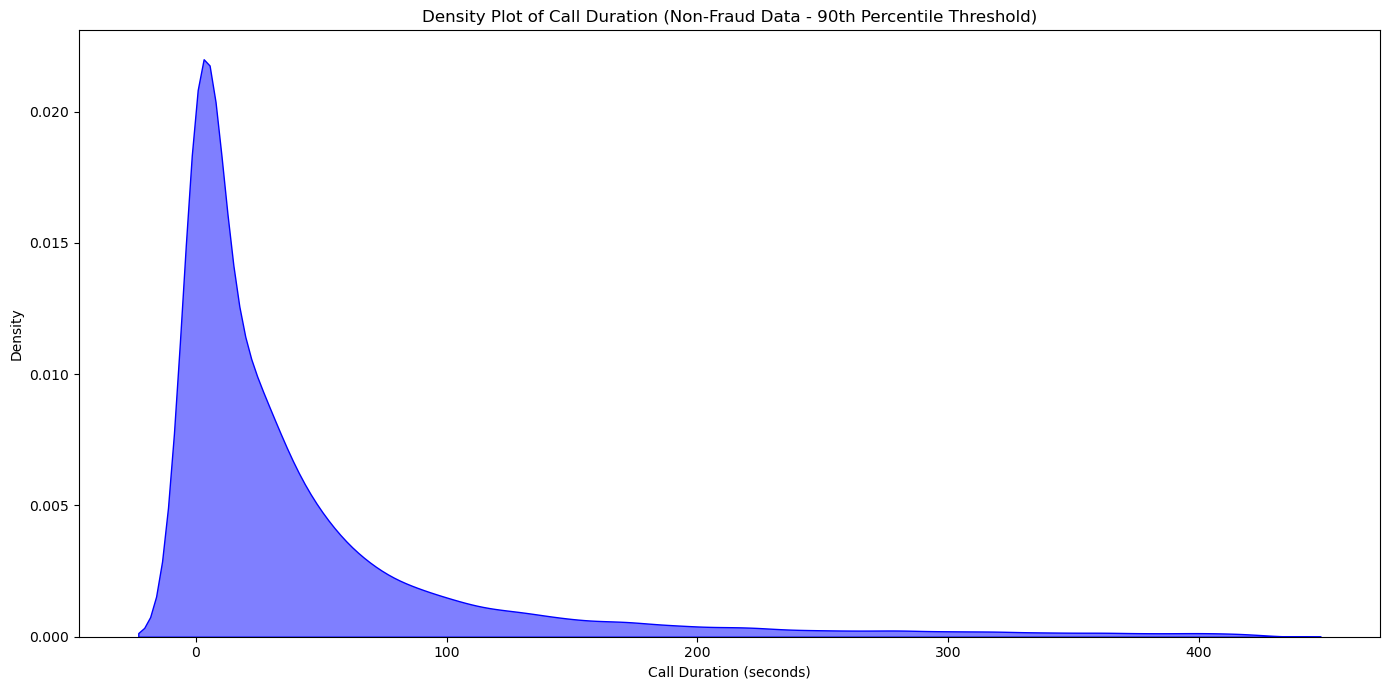

In [9]:
# Calculate 95th percentile threshold for both fraud and non-fraud data
fraud_threshold = fraud['Call_Duration'].quantile(0.95)
non_fraud_threshold = non_fraud['Call_Duration'].quantile(0.95)

# Filter data to remove Call_Durations greater than the 95th percentile
fraud_data_filtered = fraud[fraud['Call_Duration'] <= fraud_threshold]
non_fraud_data_filtered = non_fraud[non_fraud['Call_Duration'] <= non_fraud_threshold]

# KDE Plot for Fraud Data after filtering
plt.figure(figsize=(14, 7))
sns.kdeplot(x='Call_Duration', data=fraud_data_filtered, shade=True, color='red', alpha=0.5)

plt.title('Density Plot of Call Duration (Fraud Data - 95th Percentile Threshold)')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


# KDE Plot for Non-Fraud Data after filtering
plt.figure(figsize=(14, 7))
sns.kdeplot(x='Call_Duration', data=non_fraud_data_filtered, shade=True, color='blue', alpha=0.5)

plt.title('Density Plot of Call Duration (Non-Fraud Data - 90th Percentile Threshold)')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()




In [10]:
# Calculate the number of fraud rows with Call_Duration equal to 2.0
fraud_data_with_2 = fraud[fraud['Call_Duration'] == 2.0]
percentage_fraud_with_2 = (len(fraud_data_with_2) / len(fraud)) * 100
print(f"Percentage of fraud data with Call_Duration = 2.0: {percentage_fraud_with_2:.2f}%")

# Calculate the number of non-fraud rows with Call_Duration equal to 2.0
non_fraud_data_with_2 = non_fraud[non_fraud['Call_Duration'] == 2.0]
percentage_non_fraud_with_2 = (len(non_fraud_data_with_2) / len(non_fraud)) * 100
print(f"Percentage of non-fraud data with Call_Duration = 2.0: {percentage_non_fraud_with_2:.2f}%")

Percentage of fraud data with Call_Duration = 2.0: 91.12%
Percentage of non-fraud data with Call_Duration = 2.0: 34.05%


**`Observation:`** more than 90% of fraud activities have call duration of 2 seconds

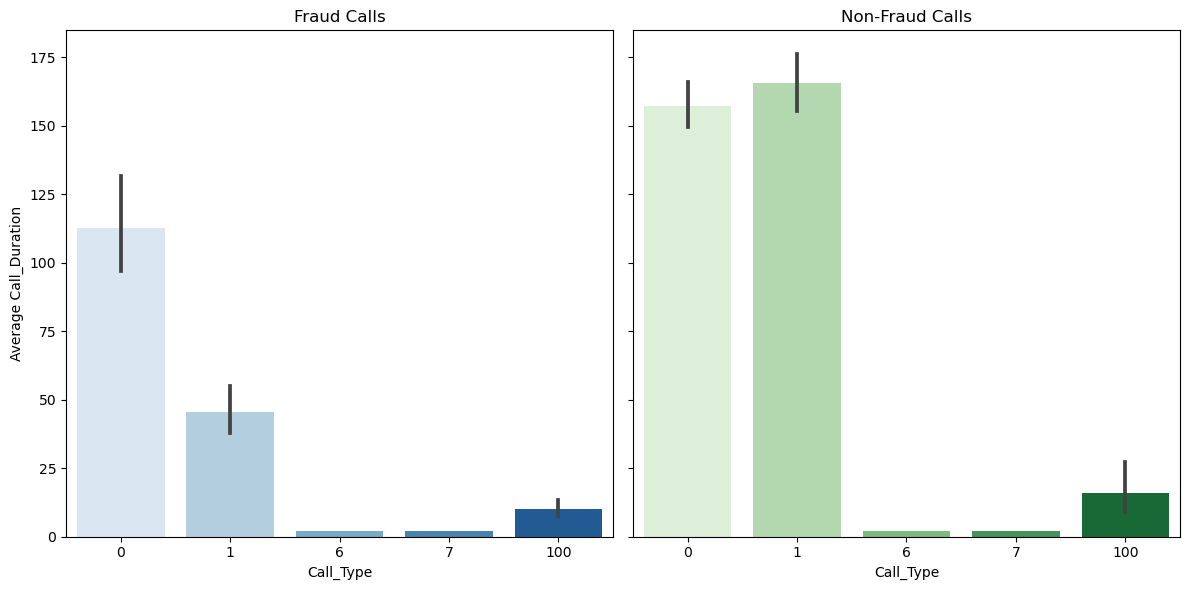

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar plot for fraud data (showing the mean Call_Duration for each Call_Type)
sns.barplot(data=fraud, x='Call_Type', y='Call_Duration', ax=axes[0], palette='Blues')
axes[0].set_title('Fraud Calls')
axes[0].set_xlabel('Call_Type')
axes[0].set_ylabel('Average Call_Duration')

# Bar plot for non-fraud data (showing the mean Call_Duration for each Call_Type)
sns.barplot(data=non_fraud, x='Call_Type', y='Call_Duration', ax=axes[1], palette='Greens')
axes[1].set_title('Non-Fraud Calls')
axes[1].set_xlabel('Call_Type')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

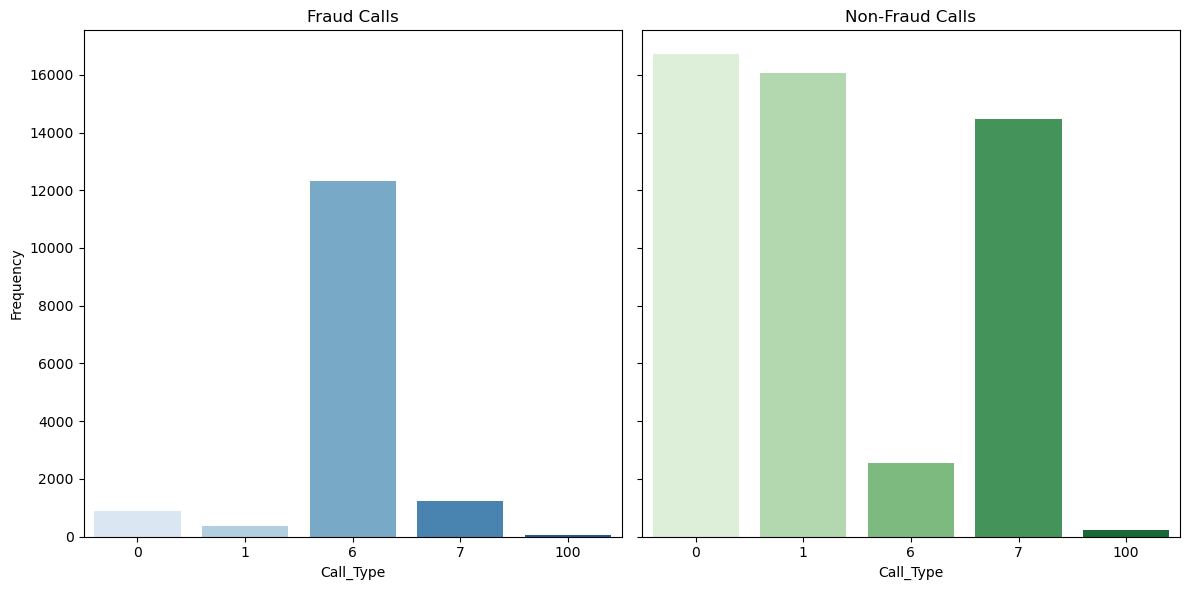

In [12]:
fraud_call_type_counts = fraud['Call_Type'].value_counts().reset_index()
non_fraud_call_type_counts = non_fraud['Call_Type'].value_counts().reset_index()

fraud_call_type_counts.columns = ['Call_Type', 'Frequency']
non_fraud_call_type_counts.columns = ['Call_Type', 'Frequency']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar plot for fraud data (showing the frequency of each Call_Type)
sns.barplot(data=fraud_call_type_counts, x='Call_Type', y='Frequency', ax=axes[0], palette='Blues')
axes[0].set_title('Fraud Calls')
axes[0].set_xlabel('Call_Type')
axes[0].set_ylabel('Frequency')

# Bar plot for non-fraud data (showing the frequency of each Call_Type)
sns.barplot(data=non_fraud_call_type_counts, x='Call_Type', y='Frequency', ax=axes[1], palette='Greens')
axes[1].set_title('Non-Fraud Calls')
axes[1].set_xlabel('Call_Type')
axes[1].set_ylabel('')

plt.tight_layout()

**`Observation:`** Most of Fraud Activities Are of 2.0 Call Duration and Call_Type 6 (SMS OUT).

---


# Analysing IMEI and TAC


## TAC:  (Type Allocation Code) Code identifying the mobile device model.

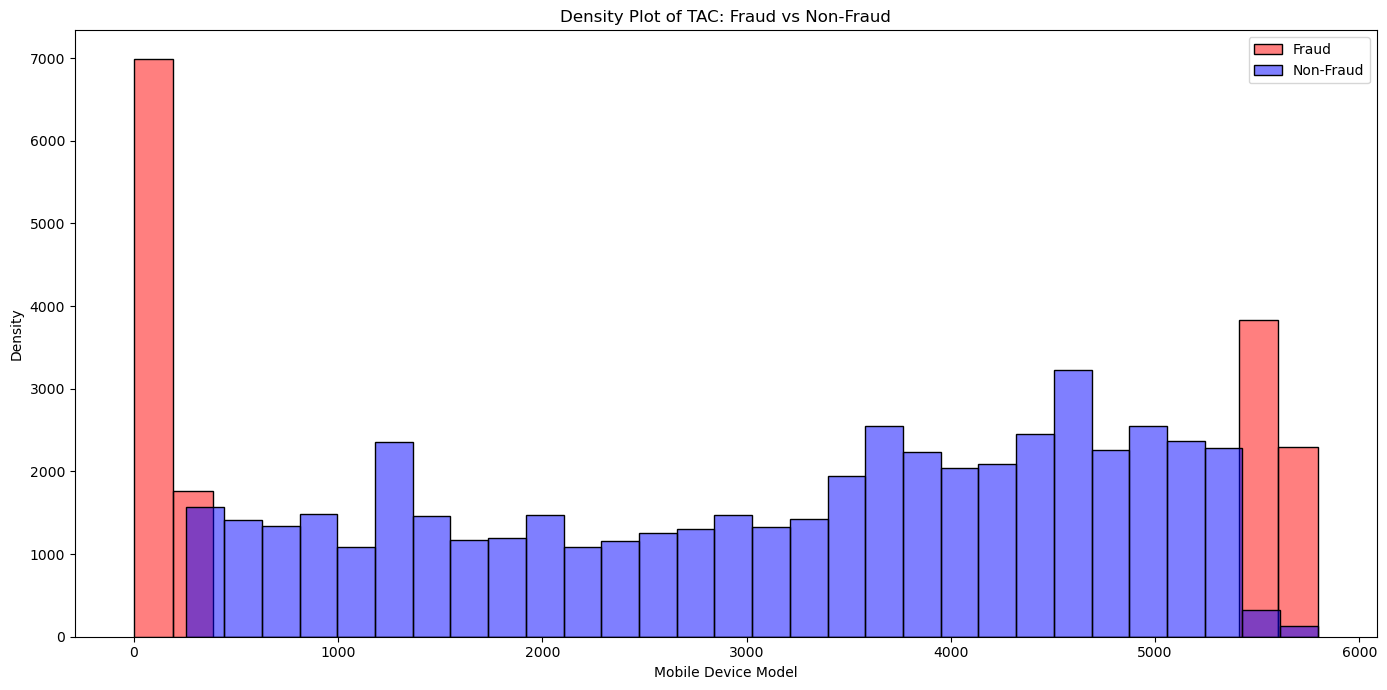

In [13]:
plt.figure(figsize=(14, 7))

# Histogram for Fraud Data
sns.histplot(fraud['TAC'], kde=False, color='red', alpha=0.5, label='Fraud', bins=30)

# Histogram for Non-Fraud Data
sns.histplot(non_fraud['TAC'], kde=False, color='blue', alpha=0.5, label='Non-Fraud', bins=30)

# Title and labels
plt.title('Density Plot of TAC: Fraud vs Non-Fraud')
plt.xlabel('Mobile Device Model')
plt.ylabel('Density')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**`Observation:`** While simple and normal communication may use various devices, specific models are used for fraud.

## IMEI: (International Mobile Equipment Identity) is a unique identifier assigned to a mobile device.

In [14]:
# Descriptive statistics for IMEI for fraud data 
imei_unique_count = fraud['IMEI'].nunique()
imei_duplicates_count = fraud['IMEI'].duplicated().sum()
imei_length = fraud['IMEI'].apply(lambda x: len(str(x))).value_counts()

# Descriptive statistics for TAC for fraud data 
tac_unique_count = fraud['TAC'].nunique()
tac_value_counts = fraud['TAC'].value_counts()

# Print the results
print( " Fraud data:")
print(f"IMEI - Unique Count: {imei_unique_count}")
print(f"IMEI - Duplicates Count: {imei_duplicates_count}")
print(f"IMEI - Length of IMEI Values:\n{imei_length}")

print(f"\nTAC - Unique Count: {tac_unique_count}")
print(f"TAC - Value Counts:\n{tac_value_counts.head()}")


 Fraud data:
IMEI - Unique Count: 494
IMEI - Duplicates Count: 14379
IMEI - Length of IMEI Values:
IMEI
5    7707
4    5082
3    1956
2     117
1      11
Name: count, dtype: int64

TAC - Unique Count: 402
TAC - Value Counts:
TAC
139     641
5723    499
134     496
210     483
176     483
Name: count, dtype: int64


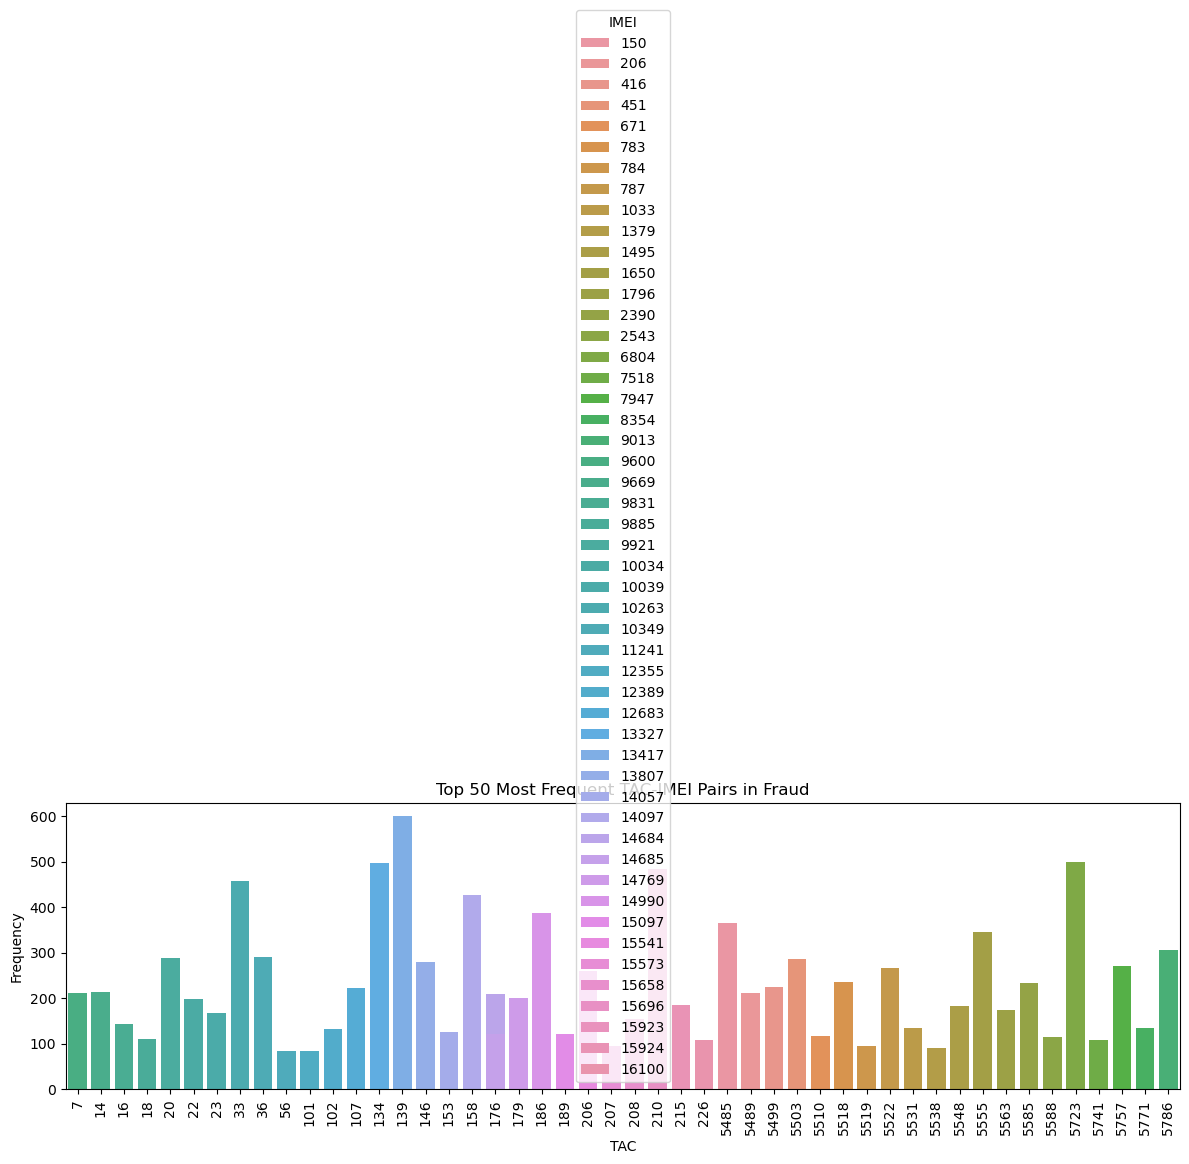

In [15]:
# Group the data by TAC and IMEI, then count the occurrences of each pair
tac_imei_counts = fraud.groupby(['TAC', 'IMEI']).size().reset_index(name='count')

# Sort by the count in descending order
tac_imei_counts = tac_imei_counts.sort_values(by='count', ascending=False)

# Keep only the top N rows (you can choose a specific number)
top_tac_imei = tac_imei_counts.head(50)  # You can adjust this number based on your needs

# Plotting the relationship between TAC and IMEI (Top 20 most frequent pairs)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_tac_imei, x='TAC', y='count', hue='IMEI', dodge=False)

# Set plot labels and title
plt.title('Top 50 Most Frequent TAC-IMEI Pairs in Fraud')
plt.xlabel('TAC')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

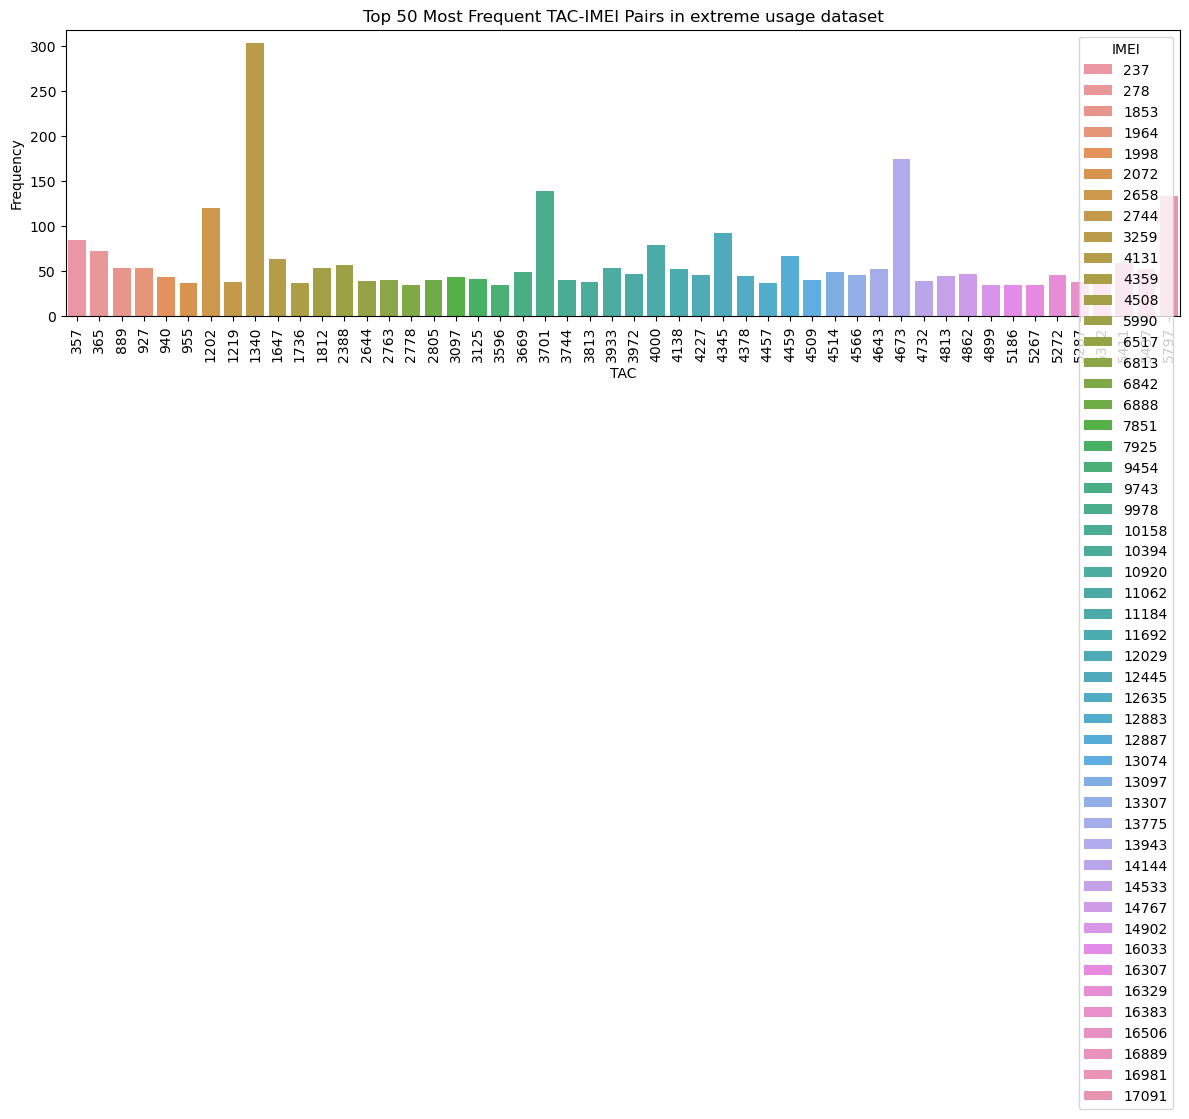

In [16]:
# Group the data by TAC and IMEI, then count the occurrences of each pair
tac_imei_counts = non_fraud.groupby(['TAC', 'IMEI']).size().reset_index(name='count')

# Sort by the count in descending order
tac_imei_counts = tac_imei_counts.sort_values(by='count', ascending=False)

# Keep only the top N rows (you can choose a specific number)
top_tac_imei = tac_imei_counts.head(50)  # You can adjust this number based on your needs

# Plotting the relationship between TAC and IMEI (Top 20 most frequent pairs)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_tac_imei, x='TAC', y='count', hue='IMEI', dodge=False)

# Set plot labels and title
plt.title('Top 50 Most Frequent TAC-IMEI Pairs in extreme usage dataset')
plt.xlabel('TAC')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

**`Observation:`** Specific devices are user for fraud operations especially those with IMEI is 9000 and  12000, mostly used device is TAC= 139  and MIEI = 12000

---

## DESTINATION_CAT: Destination category (e.g., type of call).

In [17]:
# add the destination column to the non_fraud data 

location_to_destination = dict(zip(fraud['DESTINATION_CAT'], fraud['DESTINATION']))
non_fraud['DESTINATION'] = non_fraud['DESTINATION_CAT'].map(location_to_destination)

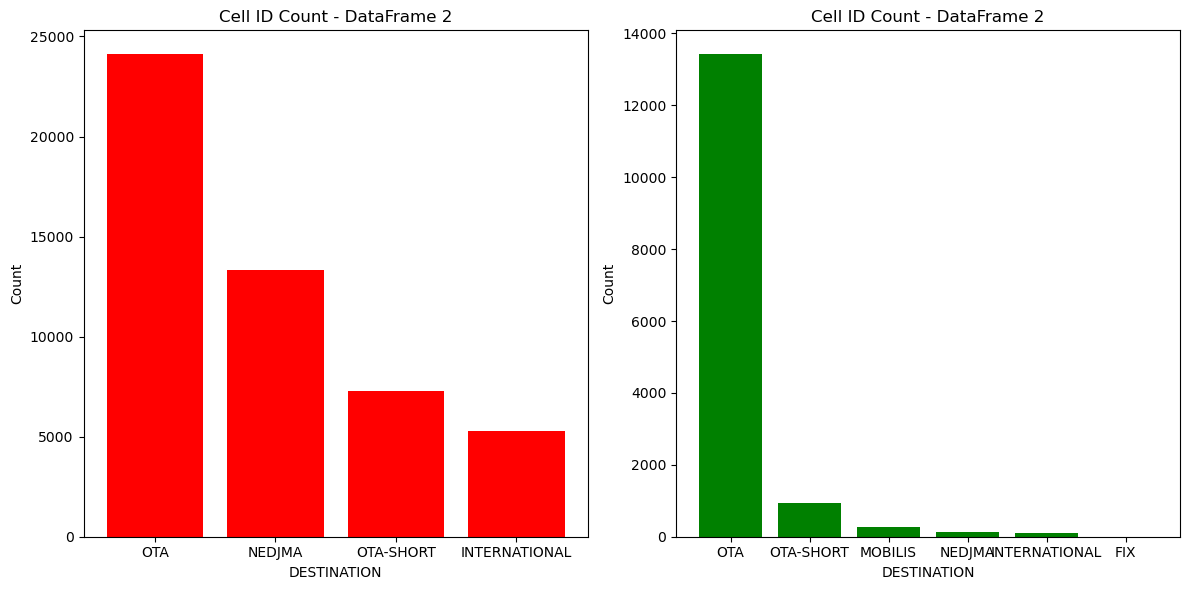

In [18]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df1_counts = non_fraud['DESTINATION'].value_counts()
axes[0].bar(df1_counts.index, df1_counts.values, color='red')
axes[0].set_title('Cell ID Count - DataFrame 2')
axes[0].set_xlabel('DESTINATION')
axes[0].set_ylabel('Count')

df2_counts = fraud['DESTINATION'].value_counts()
axes[1].bar(df2_counts.index, df2_counts.values, color='green')
axes[1].set_title('Cell ID Count - DataFrame 2')
axes[1].set_xlabel('DESTINATION')
axes[1].set_ylabel('Count')
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

**`Observation:`** most fraud destinations are of type OTA (Over-the-Air)

---

## DESTINATION_CAT: Destination category (e.g., type of call).

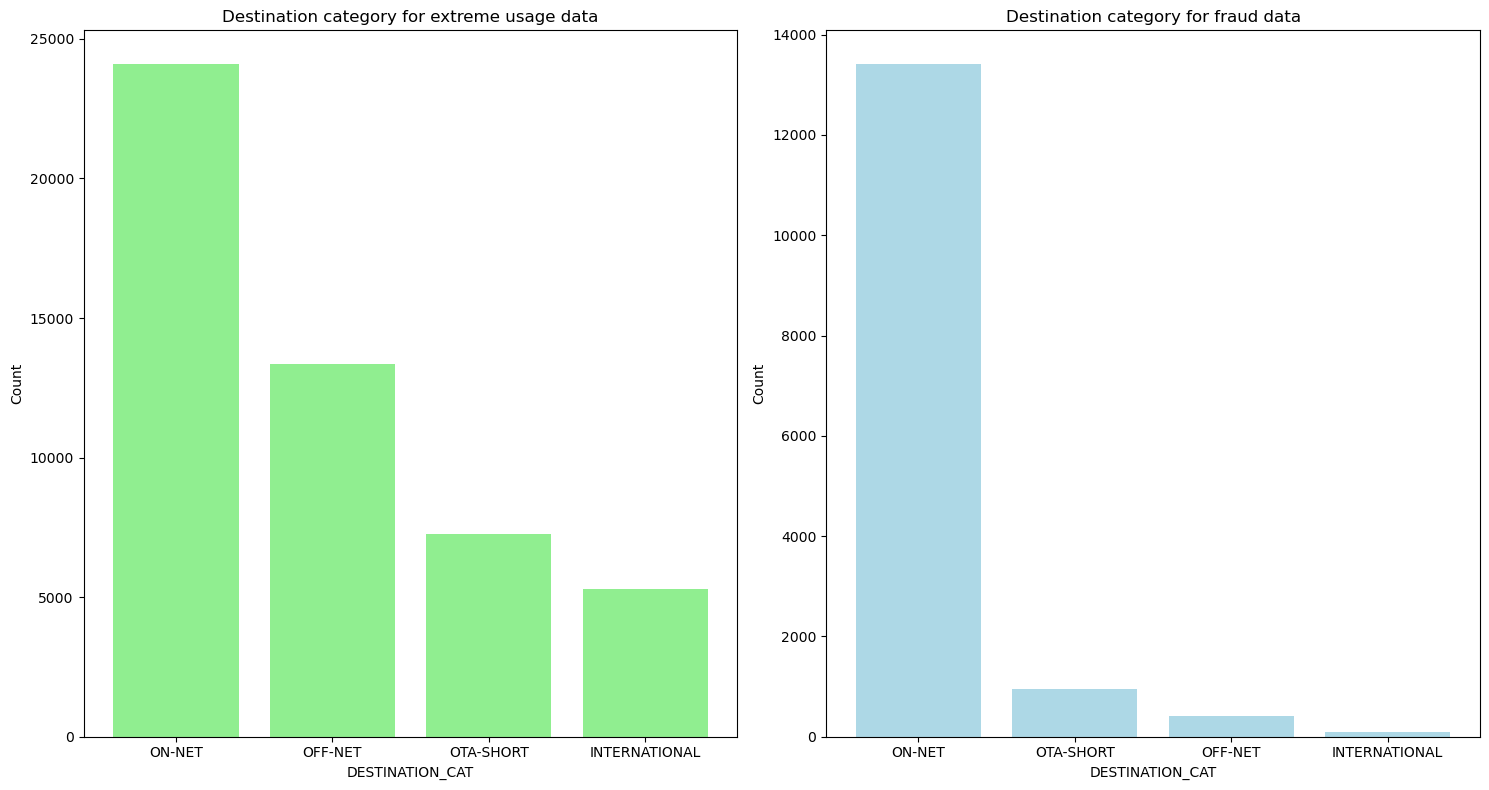

In [19]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
df1_counts = non_fraud['DESTINATION_CAT'].value_counts()
axes[0].bar(df1_counts.index, df1_counts.values, color='lightgreen')
axes[0].set_title('Destination category for extreme usage data')
axes[0].set_xlabel('DESTINATION_CAT')
axes[0].set_ylabel('Count')

df2_counts = fraud['DESTINATION_CAT'].value_counts()
axes[1].bar(df2_counts.index, df2_counts.values, color='lightblue')
axes[1].set_title('Destination category for fraud data')
axes[1].set_xlabel('DESTINATION_CAT')
axes[1].set_ylabel('Count')
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

## MU_Device_type_Segment: Type of device (e.g., smartphone, feature phone).

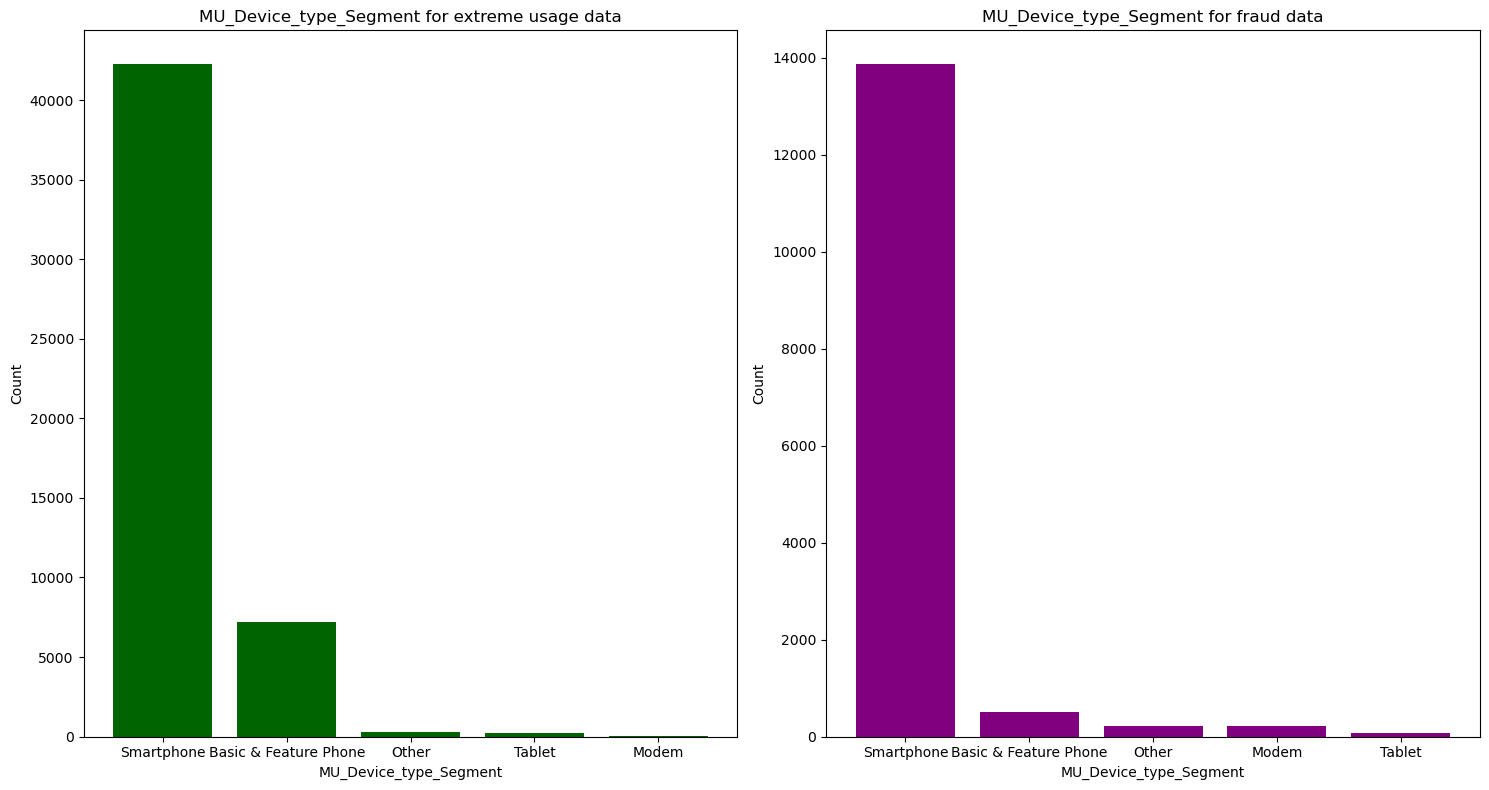

In [20]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
df1_counts = non_fraud['MU_Device_type_Segment'].value_counts()
axes[0].bar(df1_counts.index, df1_counts.values, color='darkgreen')
axes[0].set_title('MU_Device_type_Segment for extreme usage data')
axes[0].set_xlabel('MU_Device_type_Segment')
axes[0].set_ylabel('Count')

df2_counts = fraud['MU_Device_type_Segment'].value_counts()
axes[1].bar(df2_counts.index, df2_counts.values, color='purple')
axes[1].set_title('MU_Device_type_Segment for fraud data')
axes[1].set_xlabel('MU_Device_type_Segment')
axes[1].set_ylabel('Count')
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

## MU_HANDSET_MOBILE_TECH: Mobile technology (e.g., 4G, 5G).

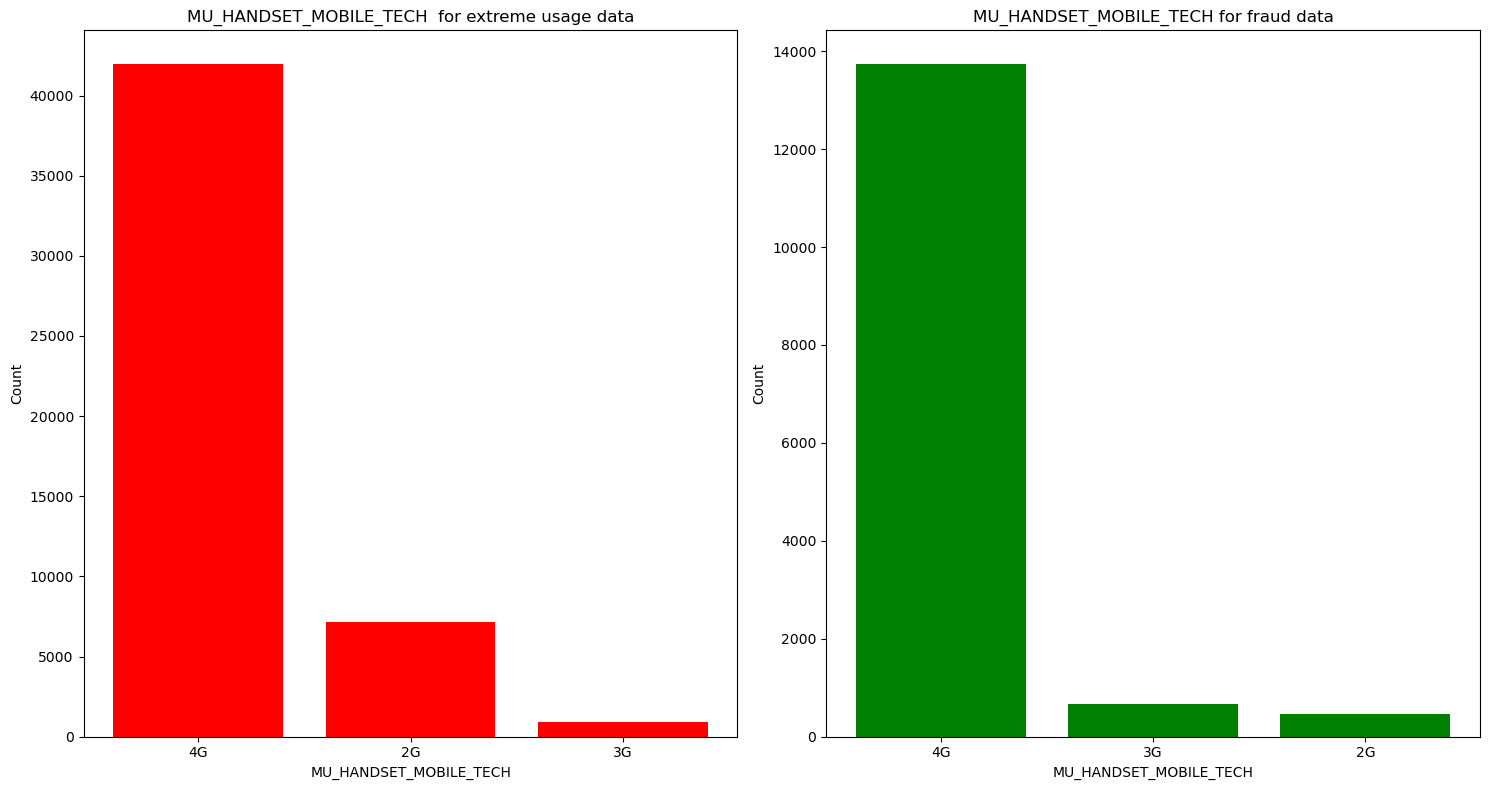

In [21]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
df1_counts = non_fraud['MU_HANDSET_MOBILE_TECH'].value_counts()
axes[0].bar(df1_counts.index, df1_counts.values, color='red')
axes[0].set_title('MU_HANDSET_MOBILE_TECH  for extreme usage data')
axes[0].set_xlabel('MU_HANDSET_MOBILE_TECH')
axes[0].set_ylabel('Count')

df2_counts = fraud['MU_HANDSET_MOBILE_TECH'].value_counts()
axes[1].bar(df2_counts.index, df2_counts.values, color='green')
axes[1].set_title('MU_HANDSET_MOBILE_TECH for fraud data')
axes[1].set_xlabel('MU_HANDSET_MOBILE_TECH')
axes[1].set_ylabel('Count')
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

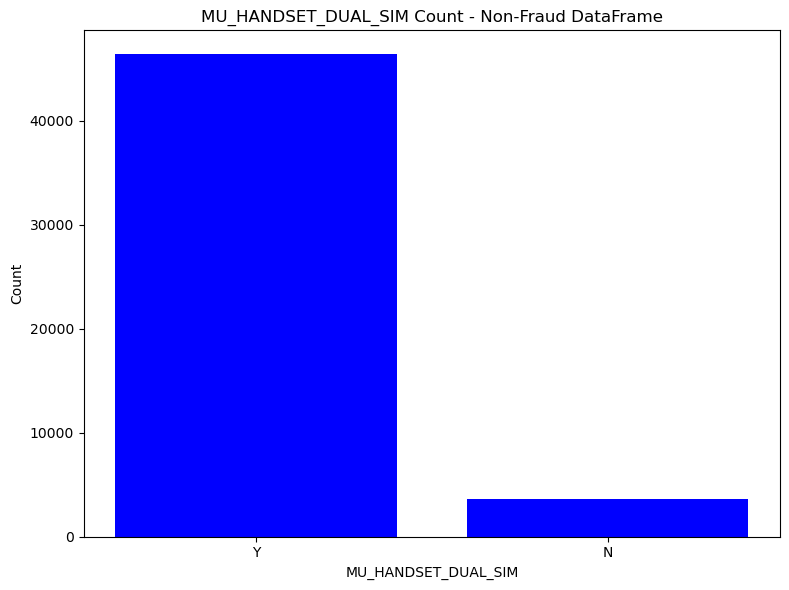

In [22]:
if 'MU_HANDSET_DUAL_SIM' in non_fraud.columns:
    df1_counts = non_fraud['MU_HANDSET_DUAL_SIM'].value_counts()
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))  

    # Plot the bar chart
    axes.bar(df1_counts.index.astype(str), df1_counts.values, color='blue')  
    axes.set_title('MU_HANDSET_DUAL_SIM Count - Non-Fraud DataFrame')
    axes.set_xlabel('MU_HANDSET_DUAL_SIM')
    axes.set_ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'MU_HANDSET_DUAL_SIM' does not exist in the non_fraud DataFrame.")

## geographical and temporal analysis:

---

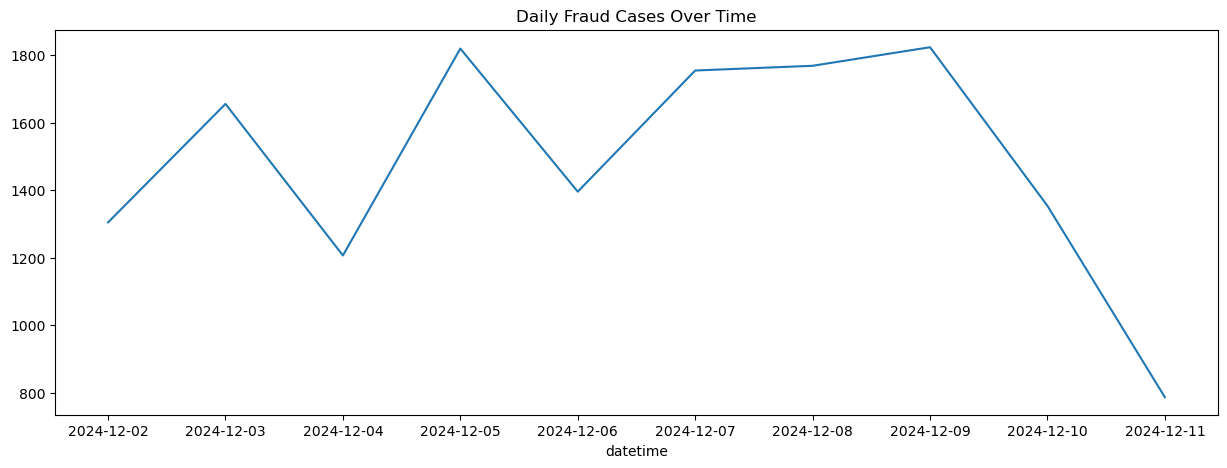

In [23]:
def analyze_temporal_patterns(df):
    df['datetime'] = pd.to_datetime(df['Charging_Tm'])
    
    # Daily fraud patterns
    daily_fraud = df[df['is_fraud'] == 1].groupby(
        df['datetime'].dt.date
    ).size()
    
    # Visualize trend
    plt.figure(figsize=(15, 5))
    daily_fraud.plot()
    plt.title('Daily Fraud Cases Over Time')
analyze_temporal_patterns(fraud)

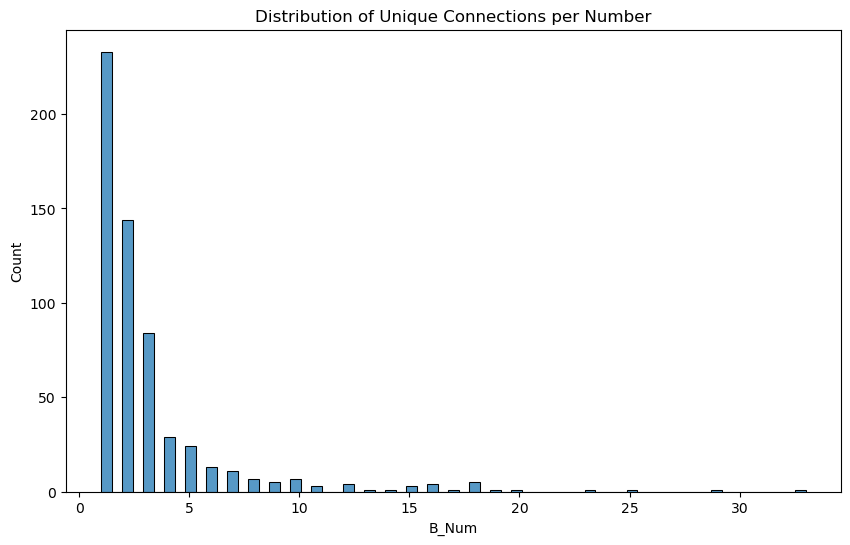

In [24]:
# Analyze relationships between numbers
def analyze_network_patterns(df):
    # Count unique connections
    unique_connections = df.groupby('A_Num')['B_Num'].nunique()
    
    # Visualize distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(unique_connections)
    plt.title('Distribution of Unique Connections per Number')
analyze_network_patterns(fraud)

<Figure size 1200x600 with 0 Axes>

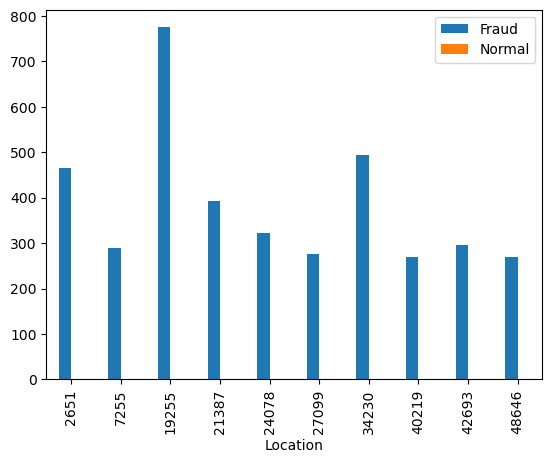

<Figure size 1200x600 with 0 Axes>

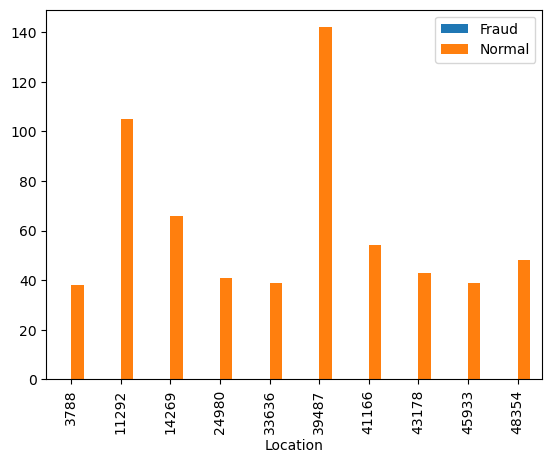

In [25]:
#fixing a name 
non_fraud.rename(columns={'LOCATION': 'Location'}, inplace=True)
# Analyze geographical patterns
def location_analysis(df):
    # Location frequency for fraud vs non-fraud
    location_fraud = df[df['is_fraud'] == 1]['Location'].value_counts()
    location_normal = df[df['is_fraud'] == 0]['Location'].value_counts()
    
    # Compare top locations
    plt.figure(figsize=(12, 6))
    pd.DataFrame({
        'Fraud': location_fraud.head(10),
        'Normal': location_normal.head(10)
    }).plot(kind='bar')
location_analysis(fraud)
location_analysis(non_fraud)

## Global Data Analysis:

---

d:\anacondaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
d:\anacondaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


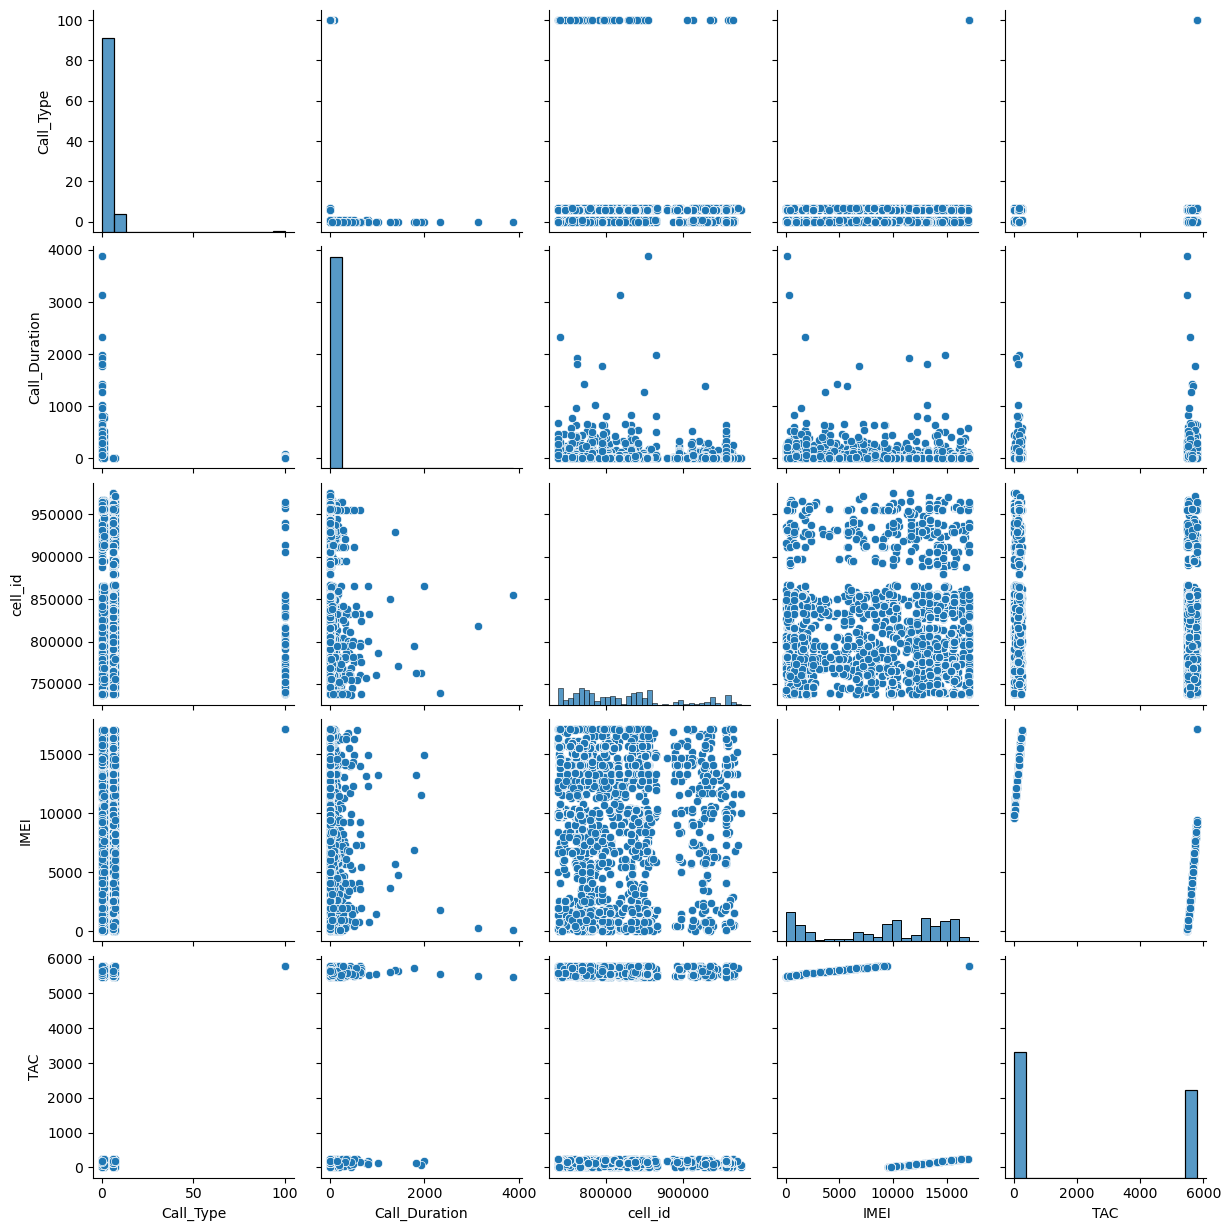

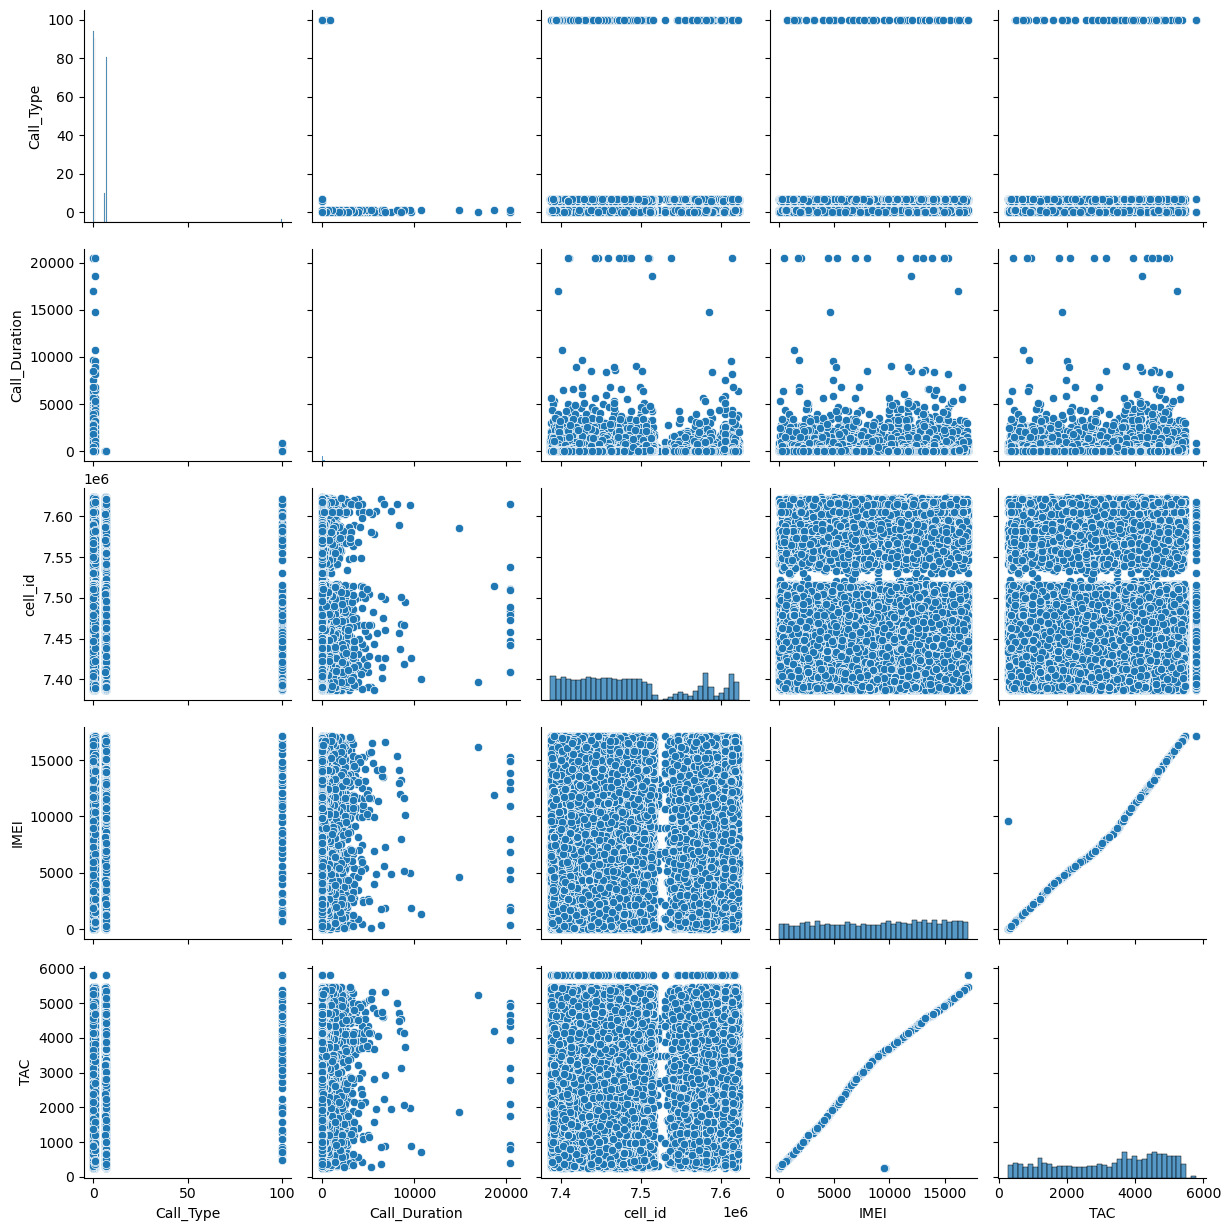

In [26]:
# Select the attributes you want to visualize
selected_attributes = ['Call_Type' , 'Call_Duration','cell_id','IMEI','TAC','DESTINATION','DESTINATION_CAT']
sns.pairplot(fraud[selected_attributes])
sns.pairplot(non_fraud[selected_attributes])
plt.show()

In [27]:
def perform_statistical_tests(fraud_df, non_fraud_df):
    # 1. Prepare the data
    # Add fraud labels
    fraud_df = fraud_df.copy()
    non_fraud_df = non_fraud_df.copy()
    
    fraud_df['is_fraud'] = 1
    non_fraud_df['is_fraud'] = 0
    
    # Combine datasets
    combined_df = pd.concat([fraud_df, non_fraud_df])
    
    # 2. Perform Chi-square test
    contingency_table = pd.crosstab(combined_df['Call_Type'], combined_df['is_fraud'])
    chi2_result = stats.chi2_contingency(contingency_table)
    
    # 3. Perform T-test
    fraud_duration = fraud_df['Call_Duration']
    non_fraud_duration = non_fraud_df['Call_Duration']
    t_stat, p_val = stats.ttest_ind(fraud_duration, non_fraud_duration)
    
    # 4. Return results
    results = {
        'chi2_test': {
            'statistic': chi2_result[0],
            'p_value': chi2_result[1],
            'dof': chi2_result[2],
            'expected': chi2_result[3]
        },
        't_test': {
            'statistic': t_stat,
            'p_value': p_val
        }
    }
    
    # 5. Print detailed analysis
    print("Statistical Analysis Results")
    print("-" * 50)
    
    print("\nCall Type Distribution:")
    print(contingency_table)
    
    print("\nCall Duration Statistics:")
    print("\nFraud calls:")
    print(fraud_duration.describe())
    print("\nNon-fraud calls:")
    print(non_fraud_duration.describe())
    
    print("\nChi-square Test Results:")
    print(f"Statistic: {results['chi2_test']['statistic']:.4f}")
    print(f"P-value: {results['chi2_test']['p_value']:.4f}")
    print(f"Degrees of Freedom: {results['chi2_test']['dof']}")
    
    print("\nT-test Results:")
    print(f"Statistic: {results['t_test']['statistic']:.4f}")
    print(f"P-value: {results['t_test']['p_value']:.4f}")
    
    return results

# Run the analysis
results = perform_statistical_tests(fraud, non_fraud)

Statistical Analysis Results
--------------------------------------------------

Call Type Distribution:
is_fraud       0      1
Call_Type              
0          16707    885
1          16055    367
6           2560  12330
7          14464   1223
100          214     68

Call Duration Statistics:

Fraud calls:
count    14873.000000
mean         9.702483
std         70.230436
min          0.945756
25%          2.000000
50%          2.000000
75%          2.000000
max       3873.816576
Name: Call_Duration, dtype: float64

Non-fraud calls:
count    50000.000000
mean       106.359622
std        503.570211
min          0.945756
25%          2.000000
50%         20.806632
75%         60.528384
max      20429.275356
Name: Call_Duration, dtype: float64

Chi-square Test Results:
Statistic: 39415.4184
P-value: 0.0000
Degrees of Freedom: 4

T-test Results:
Statistic: -23.3409
P-value: 0.0000


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

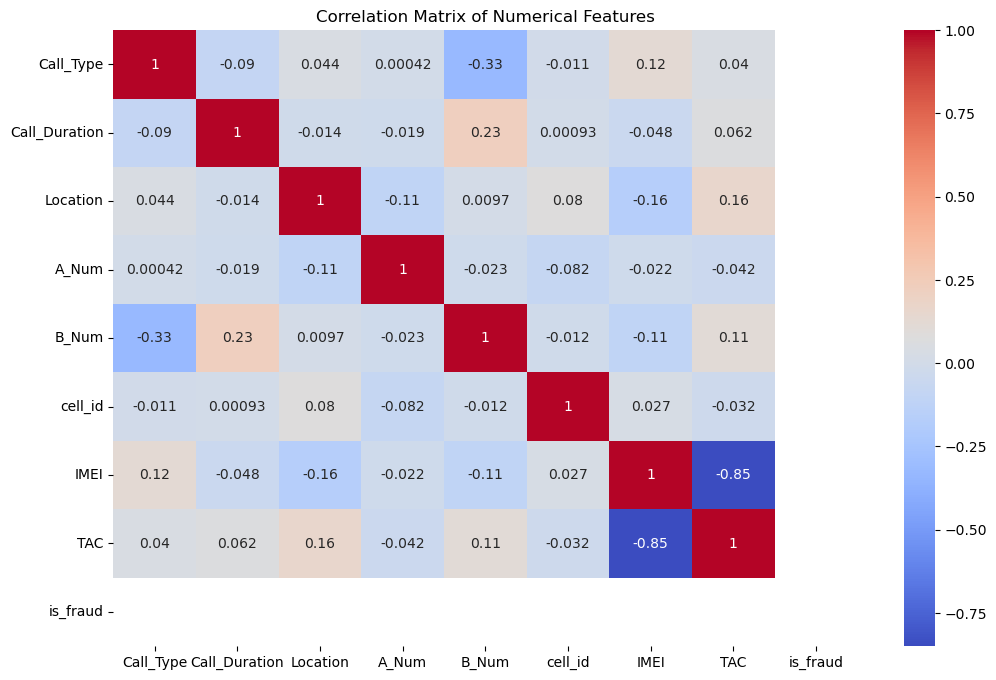

In [28]:
# Create correlation matrix for numerical variables
numeric_cols = fraud.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = fraud[numeric_cols].corr()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')

## PCA analysi:

---

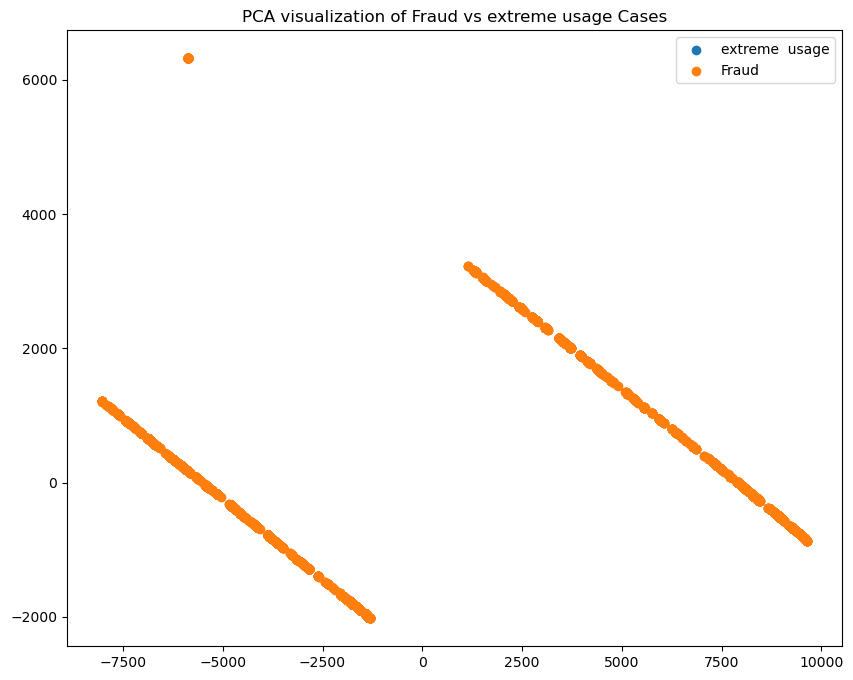

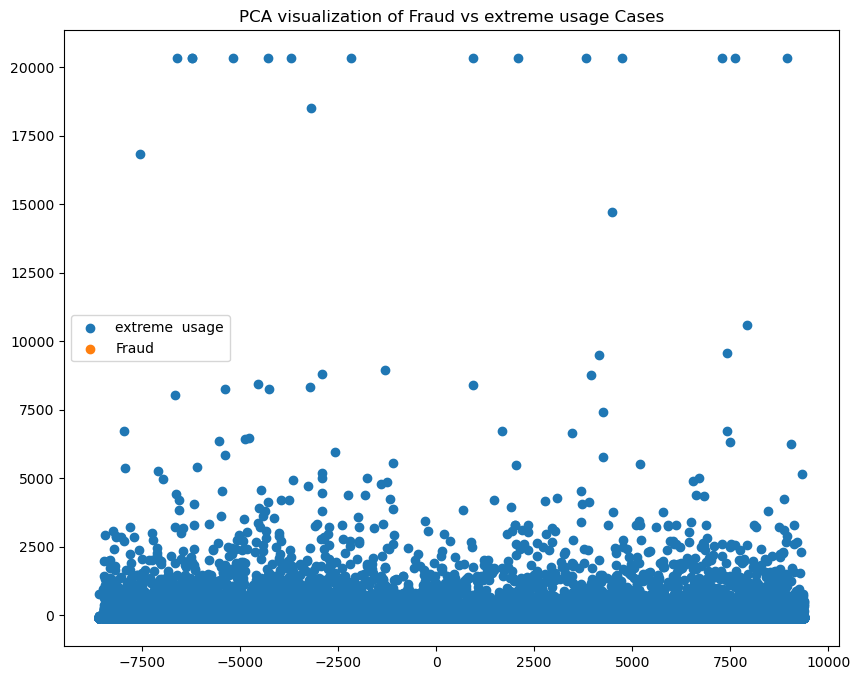

In [29]:

def visualize_anomalies(df):
    # Select numerical features
    features = ['Call_Duration', 'Call_Type', 'IMEI', 'TAC']
    X = df[features]
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[df['is_fraud']==0, 0], 
               X_pca[df['is_fraud']==0, 1], 
               label='extreme  usage')
    plt.scatter(X_pca[df['is_fraud']==1, 0], 
               X_pca[df['is_fraud']==1, 1], 
               label='Fraud')
    plt.title('PCA visualization of Fraud vs extreme usage Cases')
    plt.legend()
visualize_anomalies(fraud)
visualize_anomalies(non_fraud)

the PCA analysis confirms the previous observations and assumption made before regarding the call type and it's duration.

### **`observations:`** 
- Most of the fraudulent communications are SMS-out messages.
- These communications typically last around 2 seconds.
- They are conducted using specific devices.
- A majority of the users have dual SIM cards and primarily use On-the-Air (OAT) communications and On-Net.
- most of the data hav been collected in a short period of time and in the same geographical region.


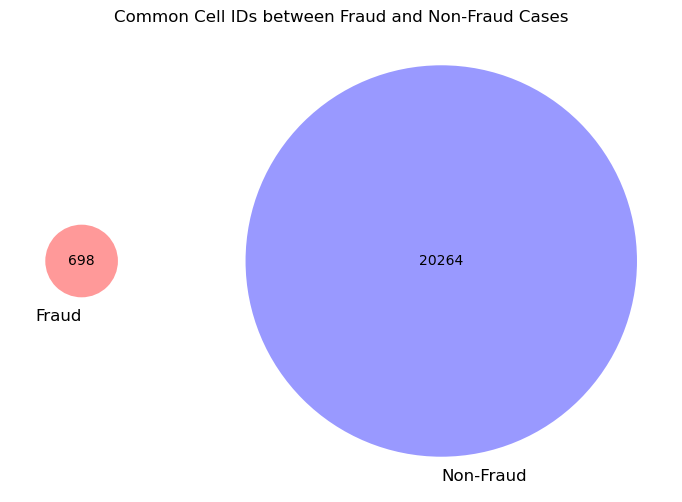


Summary Statistics for Common Cells:
--------------------------------------------------
Total unique cells in Fraud data: 698
Total unique cells in Non-Fraud data: 20264
Number of common cells: 0
Percentage of Fraud cells that are common: 0.00%
Percentage of Non-Fraud cells that are common: 0.00%


In [31]:


# Get unique cell_ids from both datasets
fraud_cells = set(fraud['cell_id'])
non_fraud_cells = set(non_fraud['cell_id'])

# Find common cell_ids
common_cells = fraud_cells.intersection(non_fraud_cells)

# Create visualization
plt.figure(figsize=(12, 6))

# Venn diagram
from matplotlib_venn import venn2
venn2([fraud_cells, non_fraud_cells], 
      set_labels=('Fraud', 'Non-Fraud'),
      set_colors=('red', 'blue'))
plt.title('Common Cell IDs between Fraud and Non-Fraud Cases')
plt.show()

# Print summary statistics
print("\nSummary Statistics for Common Cells:")
print("-" * 50)
print(f"Total unique cells in Fraud data: {len(fraud_cells)}")
print(f"Total unique cells in Non-Fraud data: {len(non_fraud_cells)}")
print(f"Number of common cells: {len(common_cells)}")
print(f"Percentage of Fraud cells that are common: {(len(common_cells)/len(fraud_cells))*100:.2f}%")
print(f"Percentage of Non-Fraud cells that are common: {(len(common_cells)/len(non_fraud_cells))*100:.2f}%")



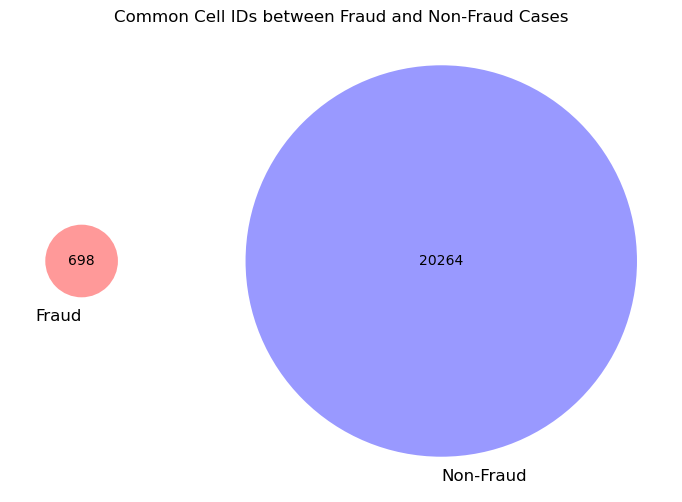


Summary Statistics for Common Cells:
--------------------------------------------------
Total unique cells in Fraud data: 698
Total unique cells in Non-Fraud data: 20264
Number of common cells: 0
Percentage of Fraud cells that are common: 0.00%
Percentage of Non-Fraud cells that are common: 0.00%


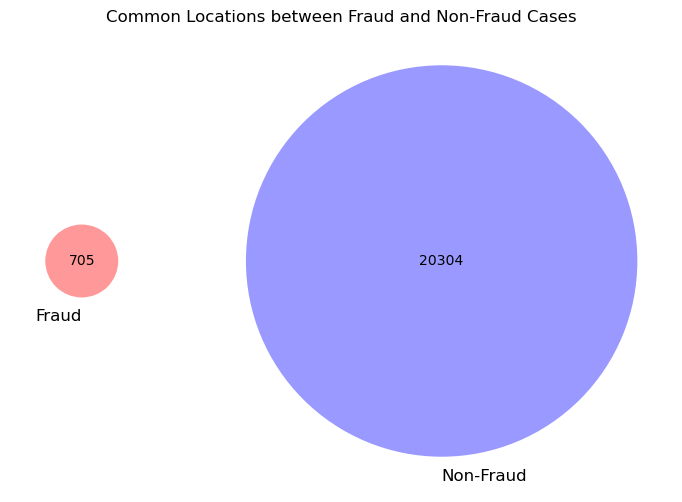


Summary Statistics for Common Locations:
--------------------------------------------------
Total unique locations in Fraud data: 705
Total unique locations in Non-Fraud data: 20304
Number of common locations: 0
Percentage of Fraud locations that are common: 0.00%
Percentage of Non-Fraud locations that are common: 0.00%


In [32]:


# Cell ID Analysis
fraud_cells = set(fraud['cell_id'])
non_fraud_cells = set(non_fraud['cell_id'])
common_cells = fraud_cells.intersection(non_fraud_cells)

plt.figure(figsize=(12, 6))
venn2([fraud_cells, non_fraud_cells], 
      set_labels=('Fraud', 'Non-Fraud'),
      set_colors=('red', 'blue'))
plt.title('Common Cell IDs between Fraud and Non-Fraud Cases')
plt.show()

print("\nSummary Statistics for Common Cells:")
print("-" * 50)
print(f"Total unique cells in Fraud data: {len(fraud_cells)}")
print(f"Total unique cells in Non-Fraud data: {len(non_fraud_cells)}")
print(f"Number of common cells: {len(common_cells)}")
print(f"Percentage of Fraud cells that are common: {(len(common_cells)/len(fraud_cells))*100:.2f}%")
print(f"Percentage of Non-Fraud cells that are common: {(len(common_cells)/len(non_fraud_cells))*100:.2f}%")

# Location Analysis
fraud_locations = set(fraud['Location'])
non_fraud_locations = set(non_fraud['Location'])
common_locations = fraud_locations.intersection(non_fraud_locations)

plt.figure(figsize=(12, 6))
venn2([fraud_locations, non_fraud_locations], 
      set_labels=('Fraud', 'Non-Fraud'),
      set_colors=('red', 'blue'))
plt.title('Common Locations between Fraud and Non-Fraud Cases')
plt.show()

print("\nSummary Statistics for Common Locations:")
print("-" * 50)
print(f"Total unique locations in Fraud data: {len(fraud_locations)}")
print(f"Total unique locations in Non-Fraud data: {len(non_fraud_locations)}")
print(f"Number of common locations: {len(common_locations)}")
print(f"Percentage of Fraud locations that are common: {(len(common_locations)/len(fraud_locations))*100:.2f}%")
print(f"Percentage of Non-Fraud locations that are common: {(len(common_locations)/len(non_fraud_locations))*100:.2f}%")



## Remove unused and irrelevant columns from the model training dataset.

In [97]:
# drop columns for the fraud data: 
fraud = fraud.drop(columns=['Charging_Tm' , 'Location','A_Num', 'B_Num', 'cell_id' , 'datetime' , 'Call_Type_Description'])

# drop columns for the extreme usage data:
non_fraud = non_fraud.drop(columns=['Charging_Tm' , 'Location','A_Num', 'B_Num', 'cell_id' , 'DESTINATION' , 'Call_Type_Description'])# DESTINATION have mapped values not that good

# drop the missing columns in both datasets:
fraud = fraud.drop(columns=['DESTINATION'])
non_fraud = non_fraud.drop(columns=['MU_HANDSET_DUAL_SIM'])


In [98]:
non_fraud.head()

,Call_Type,Call_Duration,IMEI,TAC,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH,is_fraud
0,0,119.165256,7444,2979,ON-NET,Smartphone,4G,0
1,0,43.504776,5743,2289,OFF-NET,Smartphone,4G,0
2,7,2.000000,8020,3171,ON-NET,Smartphone,4G,0
3,7,2.000000,16170,5224,OTA-SHORT,Smartphone,4G,0
4,1,507.870972,11658,4134,ON-NET,Smartphone,4G,0


In [99]:
fraud.head()

,Call_Type,Call_Duration,IMEI,TAC,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH,is_fraud
0,0,25.535412,9234,5790,ON-NET,Basic & Feature Phone,2G,1
1,7,2.000000,13327,134,OTA-SHORT,Smartphone,4G,1
2,7,2.000000,9234,5790,OFF-NET,Basic & Feature Phone,2G,1
3,7,2.000000,1796,5563,OTA-SHORT,Smartphone,4G,1
4,7,2.000000,14769,179,ON-NET,Modem,3G,1


In [100]:
# save this in a csv 
#(the class in column 'is_fraud : 1 => represents fraud data 0=> extreme usage)
fraud.to_csv("../data/processed/2-EDA/fraud.csv", index=False)
non_fraud.to_csv("../data/processed/2-EDA/non_fraud.csv", index=False)